# Importing Libraries ...
Here we are importing required libraries 

In [1]:
import io

import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

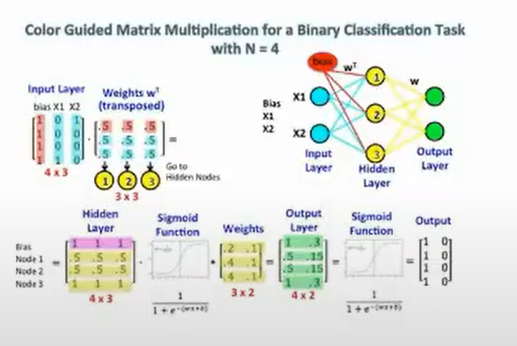

# Getting text ...
Here is a small sample of text about Avengers movie from wikipedia taken in .txtx file

In [36]:
file = open("Text.txt",'r')
raw_data = file.read()
file.close()
print(raw_data)

Avengers: Endgame is a 2019 American superhero film based on the Marvel Comics superhero team the Avengers. Produced by Marvel Studios and distributed by Walt Disney Studios Motion Pictures, it is the direct sequel to Avengers: Infinity War (2018) and the 22nd film in the Marvel Cinematic Universe (MCU). Directed by Anthony and Joe Russo and written by Christopher Markus and Stephen McFeely, the film features an ensemble cast including Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth, Scarlett Johansson, Jeremy Renner, Don Cheadle, Paul Rudd, Brie Larson, Karen Gillan, Danai Gurira, Benedict Wong, Jon Favreau, Bradley Cooper, Gwyneth Paltrow, and Josh Brolin. In the film, the surviving members of the Avengers and their allies attempt to reverse the destruction caused by Thanos in Infinity War.

The film was announced in October 2014 as Avengers: Infinity War â€“ Part 2, but Marvel later removed this title. The Russo brothers joined as directors in April 2015, with Markus a

# Preprocessing it

In [38]:
string = raw_data.split(" ")
string_list = []
for word in string:
    if word.isalpha() and len(word)>1:
        string_list.append(word.lower())
string_list

['endgame',
 'is',
 'american',
 'superhero',
 'film',
 'based',
 'on',
 'the',
 'marvel',
 'comics',
 'superhero',
 'team',
 'the',
 'produced',
 'by',
 'marvel',
 'studios',
 'and',
 'distributed',
 'by',
 'walt',
 'disney',
 'studios',
 'motion',
 'it',
 'is',
 'the',
 'direct',
 'sequel',
 'to',
 'infinity',
 'war',
 'and',
 'the',
 'film',
 'in',
 'the',
 'marvel',
 'cinematic',
 'universe',
 'directed',
 'by',
 'anthony',
 'and',
 'joe',
 'russo',
 'and',
 'written',
 'by',
 'christopher',
 'markus',
 'and',
 'stephen',
 'the',
 'film',
 'features',
 'an',
 'ensemble',
 'cast',
 'including',
 'robert',
 'downey',
 'chris',
 'mark',
 'chris',
 'scarlett',
 'jeremy',
 'don',
 'paul',
 'brie',
 'karen',
 'danai',
 'benedict',
 'jon',
 'bradley',
 'gwyneth',
 'and',
 'josh',
 'in',
 'the',
 'the',
 'surviving',
 'members',
 'of',
 'the',
 'avengers',
 'and',
 'their',
 'allies',
 'attempt',
 'to',
 'reverse',
 'the',
 'destruction',
 'caused',
 'by',
 'thanos',
 'in',
 'infinity',
 '

# Making word Pairs ...
Here we will pair up the words with window sized context words...

In [48]:
vocabulary = list(set(string_list))
vocabulary.sort()
V = len(vocabulary)
pairs = []
window_size = 5
mid = 0
rear = mid+window_size
front = mid-window_size
while mid < len(string_list):
    # we need to get all the words
    for i in range(mid+1,rear):
        if i < len(string_list):
            pairs.append((string_list[mid],string_list[i]))
    for i in range(front,mid,1):
        if i>=0 and i <len(string_list) and front < mid:
            pairs.append((string_list[mid],string_list[i]))
    front += 1
    rear += 1
    mid += 1
def oneHot(word,vocabulary):
    temp = np.zeros(len(vocabulary))
    for i in range(len(vocabulary)):
        if vocabulary[i] == word:
            temp[i] = 1
            return temp
X = []
Y = []
for pair in pairs:
    X.append(oneHot(pair[0],vocabulary))
    Y.append(oneHot(pair[1],vocabulary))

In [49]:
print("Pairs")
pairs

Pairs


[('endgame', 'is'),
 ('endgame', 'american'),
 ('endgame', 'superhero'),
 ('endgame', 'film'),
 ('is', 'american'),
 ('is', 'superhero'),
 ('is', 'film'),
 ('is', 'based'),
 ('is', 'endgame'),
 ('american', 'superhero'),
 ('american', 'film'),
 ('american', 'based'),
 ('american', 'on'),
 ('american', 'endgame'),
 ('american', 'is'),
 ('superhero', 'film'),
 ('superhero', 'based'),
 ('superhero', 'on'),
 ('superhero', 'the'),
 ('superhero', 'endgame'),
 ('superhero', 'is'),
 ('superhero', 'american'),
 ('film', 'based'),
 ('film', 'on'),
 ('film', 'the'),
 ('film', 'marvel'),
 ('film', 'endgame'),
 ('film', 'is'),
 ('film', 'american'),
 ('film', 'superhero'),
 ('based', 'on'),
 ('based', 'the'),
 ('based', 'marvel'),
 ('based', 'comics'),
 ('based', 'endgame'),
 ('based', 'is'),
 ('based', 'american'),
 ('based', 'superhero'),
 ('based', 'film'),
 ('on', 'the'),
 ('on', 'marvel'),
 ('on', 'comics'),
 ('on', 'superhero'),
 ('on', 'is'),
 ('on', 'american'),
 ('on', 'superhero'),
 ('on'

In [40]:
X

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [41]:
Y

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

# Tensorflow
Here we have written x and y paceholders. Also initialized the W and V matrices also as we know that h = xW+b1 and u = hV+b2


u gives us the probs of words to be in context window


So the values can be negative so converting it into probabilities using softmax function


In [42]:
x = tf.compat.v1.placeholder(tf.float32,shape=(None,len(vocabulary)))
y = tf.compat.v1.placeholder(tf.float32,shape=(None,len(vocabulary)))
EMBEDDING = 5
# This is embedding size that we want
W1 = tf.Variable(tf.random_normal([len(vocabulary),EMBEDDING]))
b1 = tf.Variable(tf.random_normal([EMBEDDING]))
# Weights and biases are initialized for W matrix
h = tf.add(tf.matmul(x,W1),b1)
# h = x.W+b1
W2 = tf.Variable(tf.random_normal([EMBEDDING,len(vocabulary)]))
b2 = tf.Variable(tf.random_normal([len(vocabulary)]))
# Weights and biases are initailized for V matrix
y_pred = tf.nn.softmax(tf.add(tf.matmul(h,W2),b2))
# y_pred is simply h with V matrix we get the values
# This will give probs of words near to it
ses = tf.Session()
# session variable
init = tf.global_variables_initializer()
# Initializing all variables
ses.run(init)
loss = tf.reduce_mean(-tf.reduce_sum(y*tf.log(y_pred),reduction_indices=[1]))
# Loss function using softmax

In [43]:
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
# Train function that need to be performed
epochs = 1000
for epoch in range(epochs):
    ses.run(train,feed_dict={x:X,y:Y})
    print("Loss in epoch ",epoch," is ",ses.run(loss,feed_dict={x:X,y:Y}))

Loss in epoch  0  is  9.251191
Loss in epoch  1  is  8.996631
Loss in epoch  2  is  8.79616
Loss in epoch  3  is  8.633318
Loss in epoch  4  is  8.497745
Loss in epoch  5  is  8.38277
Loss in epoch  6  is  8.283916
Loss in epoch  7  is  8.198057
Loss in epoch  8  is  8.122912
Loss in epoch  9  is  8.05675
Loss in epoch  10  is  7.9982185
Loss in epoch  11  is  7.9462175
Loss in epoch  12  is  7.899853
Loss in epoch  13  is  7.858367
Loss in epoch  14  is  7.8211207
Loss in epoch  15  is  7.787565
Loss in epoch  16  is  7.7572217
Loss in epoch  17  is  7.729681
Loss in epoch  18  is  7.704589
Loss in epoch  19  is  7.681627
Loss in epoch  20  is  7.6605263
Loss in epoch  21  is  7.641053
Loss in epoch  22  is  7.622991
Loss in epoch  23  is  7.606168
Loss in epoch  24  is  7.590424
Loss in epoch  25  is  7.575622
Loss in epoch  26  is  7.56164
Loss in epoch  27  is  7.548378
Loss in epoch  28  is  7.5357456
Loss in epoch  29  is  7.5236664
Loss in epoch  30  is  7.5120687
Loss in epoch 

Loss in epoch  249  is  6.2922015
Loss in epoch  250  is  6.289052
Loss in epoch  251  is  6.2859163
Loss in epoch  252  is  6.2827907
Loss in epoch  253  is  6.279682
Loss in epoch  254  is  6.276585
Loss in epoch  255  is  6.273498
Loss in epoch  256  is  6.2704244
Loss in epoch  257  is  6.267362
Loss in epoch  258  is  6.26431
Loss in epoch  259  is  6.261272
Loss in epoch  260  is  6.2582464
Loss in epoch  261  is  6.255232
Loss in epoch  262  is  6.252229
Loss in epoch  263  is  6.2492375
Loss in epoch  264  is  6.246255
Loss in epoch  265  is  6.243285
Loss in epoch  266  is  6.2403264
Loss in epoch  267  is  6.23738
Loss in epoch  268  is  6.234443
Loss in epoch  269  is  6.2315173
Loss in epoch  270  is  6.228602
Loss in epoch  271  is  6.225697
Loss in epoch  272  is  6.2228017
Loss in epoch  273  is  6.2199197
Loss in epoch  274  is  6.217048
Loss in epoch  275  is  6.2141857
Loss in epoch  276  is  6.211333
Loss in epoch  277  is  6.208489
Loss in epoch  278  is  6.2056584


Loss in epoch  499  is  5.7468724
Loss in epoch  500  is  5.7453313
Loss in epoch  501  is  5.743794
Loss in epoch  502  is  5.7422585
Loss in epoch  503  is  5.74073
Loss in epoch  504  is  5.739203
Loss in epoch  505  is  5.73768
Loss in epoch  506  is  5.73616
Loss in epoch  507  is  5.734643
Loss in epoch  508  is  5.7331295
Loss in epoch  509  is  5.7316213
Loss in epoch  510  is  5.7301154
Loss in epoch  511  is  5.728614
Loss in epoch  512  is  5.727113
Loss in epoch  513  is  5.725617
Loss in epoch  514  is  5.7241254
Loss in epoch  515  is  5.7226357
Loss in epoch  516  is  5.72115
Loss in epoch  517  is  5.7196674
Loss in epoch  518  is  5.718189
Loss in epoch  519  is  5.7167134
Loss in epoch  520  is  5.715241
Loss in epoch  521  is  5.713771
Loss in epoch  522  is  5.712305
Loss in epoch  523  is  5.7108436
Loss in epoch  524  is  5.7093835
Loss in epoch  525  is  5.707929
Loss in epoch  526  is  5.7064743
Loss in epoch  527  is  5.7050257
Loss in epoch  528  is  5.703578


Loss in epoch  750  is  5.4461346
Loss in epoch  751  is  5.4452014
Loss in epoch  752  is  5.44427
Loss in epoch  753  is  5.443342
Loss in epoch  754  is  5.442417
Loss in epoch  755  is  5.4414916
Loss in epoch  756  is  5.4405665
Loss in epoch  757  is  5.4396453
Loss in epoch  758  is  5.4387245
Loss in epoch  759  is  5.4378066
Loss in epoch  760  is  5.4368887
Loss in epoch  761  is  5.4359713
Loss in epoch  762  is  5.4350576
Loss in epoch  763  is  5.4341464
Loss in epoch  764  is  5.433236
Loss in epoch  765  is  5.4323254
Loss in epoch  766  is  5.431417
Loss in epoch  767  is  5.4305105
Loss in epoch  768  is  5.4296074
Loss in epoch  769  is  5.4287024
Loss in epoch  770  is  5.4278
Loss in epoch  771  is  5.4269
Loss in epoch  772  is  5.426003
Loss in epoch  773  is  5.425104
Loss in epoch  774  is  5.4242096
Loss in epoch  775  is  5.4233146
Loss in epoch  776  is  5.4224224
Loss in epoch  777  is  5.4215302
Loss in epoch  778  is  5.420642
Loss in epoch  779  is  5.419

Loss in epoch  998  is  5.255292
Loss in epoch  999  is  5.2546563


In [44]:
vectors = ses.run(W1 + b1)
# Getting vectors

In [33]:
vectors

array([[-0.03662708,  0.76087916, -0.22487323, -0.8735899 , -0.30063745],
       [-0.22175458,  3.9253314 ,  0.99992806, -0.3095485 , -1.4569577 ],
       [-0.9880455 , -0.85857147,  1.9749749 , -0.72146285, -0.10948151],
       [ 0.814606  ,  0.8233851 , -0.9802307 , -2.209985  ,  2.0114374 ],
       [-0.9652589 , -0.09793681, -2.611771  , -2.2359056 , -2.1027293 ],
       [-0.04940481, -0.15493858, -0.81016004,  0.95031387,  0.8106886 ],
       [-1.3990109 , -0.199691  , -2.7249777 , -2.500986  , -2.646895  ],
       [ 2.5213947 , -0.13743114,  0.1896441 , -0.6891742 , -0.3246319 ]],
      dtype=float32)

# Findings...
Here we will try to find all words closer to given word by using eucledian distance as a measure

In [45]:
def eucledian(a,b):
    return np.linalg.norm(np.array(a)-np.array(b))
def closest(vocabulary,vectors,word):
    index = vocabulary.index(word)
    distances = []
    for i in range(len(vocabulary)):
        if i != index:
            distances.append(eucledian(vectors[index],vectors[i]))
    return distances
# Computing which is closer

In [46]:
closest(vocabulary,vectors,"avengers")

[2.659047,
 1.9471232,
 1.8313687,
 2.1896677,
 2.0469625,
 2.6633434,
 3.675985,
 1.2133421,
 1.371107,
 1.8104329,
 2.2357628,
 2.0425088,
 1.8431367,
 2.9864604,
 1.7537298,
 3.0858924,
 1.1193576,
 2.406803,
 3.100792,
 2.3452134,
 1.5677454,
 1.411384,
 2.0695553,
 1.1655718,
 3.657773,
 3.092777,
 2.7988951,
 2.1293426,
 1.5861133,
 1.685985,
 2.239459,
 2.4406948,
 2.6333582,
 2.8839002,
 1.8369768,
 1.5532615,
 1.8491098,
 2.6201286,
 2.2599854,
 1.5541375,
 2.3342228,
 2.980137,
 2.080211,
 1.653437,
 2.0896122,
 1.4189318,
 2.389888,
 1.5351441,
 3.8414464,
 2.3764346,
 2.9038358,
 2.6467798,
 1.3446115,
 2.550367,
 3.1428406,
 2.5442157,
 1.7243979,
 2.6893892,
 1.4983045,
 2.1233675,
 1.2285883,
 1.8297081,
 2.2378871,
 1.2706549,
 1.1078708,
 2.4945455,
 3.2082822,
 1.7039154,
 0.8430476,
 1.9023325,
 1.3157268,
 2.3761406,
 2.927154,
 0.98736376,
 1.7272304,
 1.9317642,
 1.6367507,
 1.628866,
 1.7856429,
 1.4578202,
 1.2304515,
 1.5570217,
 1.3742124,
 2.4634442,
 1.38073